In [1]:

import pandas as pd
import yfinance as yf
import fredapi as fa
from datetime import date, timedelta
from Sector_Exposure import Rate_Exposures
import numpy as np
from sklearn.linear_model import LinearRegression
from Yield_Curves import YieldCurve

fred = fa.Fred('4fb0ce271d0f66f4b5b3904b4aaf1dd0')


In [2]:



def update_data(compare_group = None, rate_comp = None):
    
    assert compare_group, rate_comp
    
    sector_names = ['Materials', 'Industrials', 'Consumer Discretionary', 
                        'Consumer Staples', 'Health Care',
                        'Financials', 'Information Technology', 
                        'Telecommunication Services', 'Utilities', 'Real Estate', 'Energy', 'Semiconductors', "Aerospace",
                        'Value', 'Quality', 'Size', 'Default',
                        "Real Yield", "Yield Curve", "ten", "two", "SP-500"]
    
    
    sec = yf.download([f"^SP500-{i}" for i in range(15,65,5)], start = '2010-01-04', progress=False)["Close"]
    sec['Energy'] = yf.download(["^GSPE"], start = '2010-01-04', progress=False)["Close"]
    sec['Semiconductors'] = yf.download(["SOXX"], start = '2010-01-04', progress=False)["Close"]
    sec['Aerospace'] = yf.download(["ITA"], start = '2010-01-04', progress=False)["Close"]
    
    sec['Value'] = yf.download(["VLUE"], start = '2010-01-04', progress=False)["Close"]
    sec['Quality'] = yf.download(["QUAL"], start = '2010-01-04', progress=False)["Close"]
    sec['Size'] = yf.download(["SIZE"], start = '2010-01-04', progress=False)["Close"]
    sec['Default'] = yf.download(["FIBR"], start = '2010-01-04', progress=False)["Close"]
    
    
    sec['Real Yield'] = fred.get_series('DFII10', observation_start = '2010-01-04', end = date.today())
    sec['Yield Curve'] = fred.get_series('T10Y2Y', observation_start = '2010-01-04', end = date.today())
    sec['ten'] = fred.get_series('DGS10', observation_start = '2010-01-04', end = date.today())
    sec['two'] = fred.get_series('DGS2', observation_start = '2010-01-04', end = date.today())
    sec['SP-500'] = yf.download("^GSPC", start = '2010-01-04', progress=False)["Close"]
    
    if 'sector' in compare_group.lower():
        sec.columns = sector_names
    #elif 'factor' in compare_group.lower():
    
    return sec.drop(columns = ['ten', 'two']).dropna()
    
    '''
    if 'real' in rate_comp.lower():
        return sec.drop(columns = ['Yield Curve', '10-Year', '2-Year']).dropna()
    elif 'pattern' in rate_comp.lower():
        return sec.dropna()
    else:
        return sec.drop(columns = ['Real Yield', '10-Year', '2-Year']).dropna()
    '''
    



In [21]:


#def generate_portfolio_sector_split(portfolio_tickers):
    
    #for ticker in portfolio_tickers:


tick = yf.Ticker("APO")

tick.info['sector']


'Financial Services'

In [3]:


df = update_data('sectors', 'real rate')
#yield_curve_df = update_data('sectors', 'yield curve')



In [6]:


exposure_report = Rate_Exposures(df, 252, 120, ['Real Yield', 'Yield Curve'])
#yield_curve = Rate_Exposures(yield_curve_df, 252, 120, "Yield Curve")



c:\Users\Rhys Logan\OneDrive\Desktop\740\Sector_Exposure.py:108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.mean_returns[(score, score_2)] = self.total_returns[(score, score_2)].mean()


In [9]:


exposure_report.mean_returns



Materials  Industrials  Consumer Discretionary  Consumer Staples  \
-5 -5  -0.093567    -0.019543               -0.040939         -0.094219   
   -4  -0.092026    -0.022271               -0.029838         -0.095346   
   -2   0.001853     0.008345                0.014191          0.012449   
    0   0.038189    -0.077552                0.193135         -0.164363   
    1   0.070115     0.031642                0.123818         -0.117857   
...          ...          ...                     ...               ...   
 4  1  -0.074625    -0.034521                0.023732         -0.054155   
    3   0.016594    -0.002834               -0.026203         -0.085543   
    4   0.003433    -0.035303               -0.041972         -0.045951   
    5   0.005799    -0.032354               -0.028531         -0.034174   
 5  1  -0.142884    -0.043203                0.011360         -0.074882   

       Health Care  Financials  Information Technology  \
-5 -5    -0.010848    0.011193                0.140244   
   -4    -0.002734    0.008998                0.126268   
   -2    -0.068104    0.042579                0.032165   
    0    -0.097850   -0.156535                0.219868   
    1    -0.088702   -0.065142                0.122941   
...            ...         ...                     ...   
 4  1     0.027291   -0.083112                0.059828   
    3     0.065965   -0.011038                0.134410   
    4     0.067251   -0.017796                0.129680   
    5     0.047177   -0.046657                0.133362   
 5  1     0.060529   -0.092492                0.049345   

       Telecommunication Services  Utilities  Real Estate    Energy  \
-5 -5                   -0.004669  -0.046897    -0.120456 -0.198606   
   -4                   -0.010633  -0.031836    -0.099456 -0.185197   
   -2                    0.008969   0.006192     0.023810 -0.133663   
    0                    0.051867  -0.337392    -0.253389 -0.218156   
    1                    0.010501  -0.146240    -0.123464 -0.250009   
...                           ...        ...          ...       ...   
 4  1                   -0.043326   0.030048     0.030030 -0.011150   
    3                   -0.199519  -0.018503    -0.062234 -0.224920   
    4                   -0.202781   0.024322    -0.025813 -0.215532   
    5                   -0.180616   0.061295    -0.000296 -0.215831   
 5  1                   -0.065156   0.052357     0.003447  0.077201   

       Semiconductors  Aerospace     Value   Quality      Size   Default  
-5 -5        0.133984  -0.043023  0.003354 -0.000885 -0.032244 -0.162411  
   -4        0.140541  -0.040868  0.006585 -0.001128 -0.025310 -0.147631  
   -2        0.071144   0.113549 -0.010708 -0.001911 -0.006602 -0.053888  
    0        0.162994  -0.315594 -0.185958 -0.020472 -0.059435 -0.258267  
    1        0.178361  -0.103102 -0.053672 -0.009226  0.018983 -0.200882  
...               ...        ...       ...       ...       ...       ...  
 4  1        0.011774  -0.005836 -0.039659  0.004264 -0.012967 -0.059968  
    3        0.185974   0.150865 -0.026514 -0.006763 -0.023499 -0.107221  
    4        0.148623   0.057874 -0.020198 -0.014127 -0.020553 -0.110483  
    5        0.141017   0.071282 -0.024553 -0.017375 -0.019226 -0.104935  
 5  1       -0.073936   0.006856 -0.029015 -0.000013 -0.011880 -0.083585  

[88 rows x 17 columns]

In [22]:

exposure_report.ry_total_returns[2]['Information Technology'].sort_values()[:20]


2018-05-11   -0.046443
2018-05-25   -0.046103
2021-09-24   -0.014241
2018-09-11   -0.012121
2018-03-22   -0.011039
2018-09-10   -0.009612
2018-09-13   -0.009285
2018-09-07   -0.007462
2018-03-26   -0.006838
2018-09-12   -0.000601
2018-03-16    0.001021
2021-09-28    0.002901
2018-04-19    0.003592
2018-03-13    0.005353
2018-09-28    0.006797
2021-09-30    0.007168
2018-04-05    0.008310
2018-10-02    0.008435
2018-03-19    0.008900
2018-03-07    0.009246
Name: Information Technology, dtype: float64

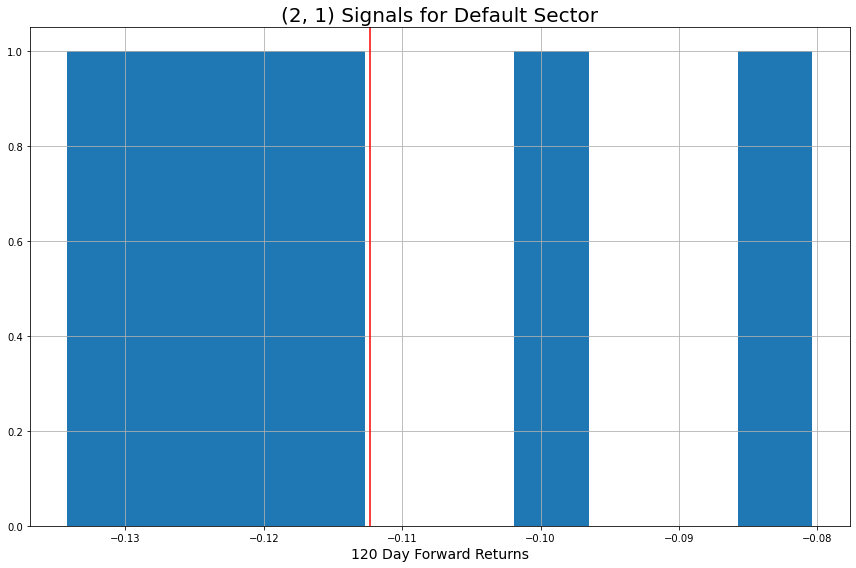

In [25]:


# (4,3)
# 'Information Technology'
exposure_report.show_return_distribution('Default', (2, 1))


#real_rate.total_returns



In [30]:

# Factor Tickers:

# ^SPXQUP


# Value: VLUE
# Quality: QUAL
# Momentum: MTUM
# Size: SIZE
# Default: FIBR




HTTPError: HTTP Error 403: Forbidden

In [16]:


def beta(data_2_columns):
    
    log_returns = np.log(data_2_columns/data_2_columns.shift())
    
    return (log_returns.cov() / log_returns.var())[log_returns.columns[0]].iloc[1]
    
    



In [17]:



beta(real_rate_df[['Materials', 'SP-500']])




0.7246502122767499

In [8]:

mat = c.get_sector_forward_return(c.scores, "Materials")

AttributeError: 'CompareSectors' object has no attribute 'get_sector_forward_return'

In [21]:


yuh['Materials'] == mat['30-Day Forward Return']




2012-01-09    True
2012-01-10    True
2012-01-11    True
2012-01-12    True
2012-01-13    True
              ... 
2022-04-07    True
2022-04-08    True
2022-04-11    True
2022-04-12    True
2022-04-13    True
Length: 2437, dtype: bool

In [7]:

# .drop(columns = ['SP-500'])
c = CompareSectors(cool, 252*2, 30)

rets = c.get_return_means()




['Materials', 'Industrials', 'Consumer Discretionary', 'Consumer Staples', 'Health Care', 'Financials', 'Information Technology', 'Telecommunication Services', 'Utilities', 'Real Estate', 'Energy', 'Semiconductors', 'Aerospace']
Materials
Industrials
Consumer Discretionary
Consumer Staples
Health Care
Financials
Information Technology
Telecommunication Services
Utilities
Real Estate
Energy
Semiconductors
Aerospace


,Materials,Industrials,Consumer Discretionary,Consumer Staples,Health Care,Financials,Information Technology,Telecommunication Services,Utilities,Real Estate,Energy,Semiconductors,Aerospace
-5,0.000617,-0.030278,0.037210,-0.030313,0.001725,-0.037020,0.027196,0.017230,-0.036913,-0.049653,-0.011154,0.034408,-0.049139
-4,0.015785,0.004656,0.004084,0.000982,-0.001610,-0.001997,0.009602,-0.008703,-0.016870,-0.015350,-0.051065,0.027530,-0.017540
-3,-0.002614,-0.004092,0.008682,-0.002052,-0.004110,-0.005038,0.016778,0.000358,-0.023473,-0.022742,-0.050373,0.016872,-0.022844
-2,0.000078,-0.005131,0.003580,-0.007578,-0.001113,0.004697,0.008820,-0.002957,-0.007394,-0.004183,-0.027857,0.022025,-0.008390
-1,-0.001979,0.001682,-0.001101,-0.010535,-0.004486,0.014369,0.007386,-0.007523,-0.018441,-0.009586,0.010230,0.020499,0.007172
0,-0.005030,-0.002615,0.004167,-0.003534,0.005477,0.002719,0.007727,-0.012287,-0.010024,-0.008719,-0.005225,0.009708,0.005941
1,-0.006908,0.000436,0.006225,-0.000484,0.004490,-0.007563,0.005541,-0.005057,0.003821,-0.000555,-0.005824,0.000128,0.006095
2,-0.006246,-0.000188,0.000731,0.000422,0.005234,-0.012030,0.008704,-0.011417,0.017655,0.010462,-0.006029,0.003556,0.008820
3,-0.005670,-0.007613,-0.000279,0.010308,0.011246,-0.009736,0.002744,-0.006375,0.027451,0.020651,-0.015335,0.008562,0.002098
4,0.005307,0.004287,-0.004293,0.014081,0.015563,-0.006457,-0.009928,-0.026052,0.023247,0.006317,0.023326,0.004056,0.016567


In [51]:


#c.get_sector_forward_return(c.scores, "Materials")['30-Day Forward Return'].plot()


#(-1*(cool['Materials'].diff(-30)/cool['Materials'])).plot()

(cool.iloc[60] / cool.iloc[30]) - 1

Materials                     0.066729
Industrials                   0.102437
Consumer Discretionary        0.096237
Consumer Staples              0.036774
Health Care                   0.023846
Financials                    0.116396
Information Technology        0.066650
Telecommunication Services    0.037410
Utilities                     0.019621
Real Estate                   0.133663
Energy                        0.014165
Semiconductors                0.055306
Aerospace                     0.113164
Real Yield                    0.095890
SP-500                        0.063592
dtype: float64

<BarContainer object of 9 artists>

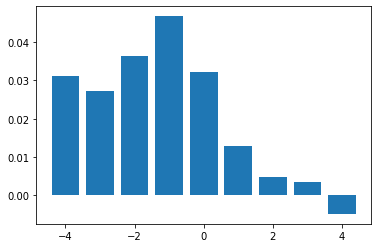

In [65]:
import matplotlib.pyplot as plt

#rets.mean(axis=1)


plt.bar(rets.index, rets['Semiconductors'])



<BarContainer object of 9 artists>

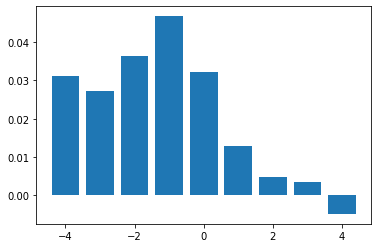

In [77]:


plt.bar(rets.index, rets['Semiconductors'])



In [70]:

semi = c.get_sector_forward_return(c.scores, "Semiconductors")



0.07894736842105263

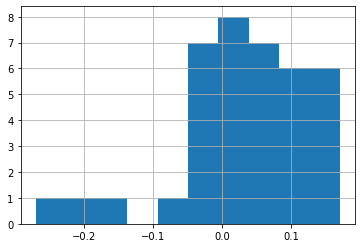

In [80]:



semi['30-Day Forward Return'].loc[semi.Scores == -4].hist()


len(semi['30-Day Forward Return'].loc[semi.Scores == -4])

